In [1]:
!pip install seaborn
!pip install tensorflow
!pip install pandas
!pip install -U scikit-learn scipy matplotlib

distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
distutils: /home/alessandro/.local/include/python3.8/UNKNOWN
sysconfig: /home/alessandro/.local/include/python3.8
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/includ

distutils: /home/alessandro/.local/include/python3.8/UNKNOWN
sysconfig: /home/alessandro/.local/include/python3.8
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
distutils: /home/alessandro/.local/include/python3.8/UNKNOWN
sysconfig: /home/alessandro/.local/include/python3.8
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

#Importo test e test set
train_raw = pd.read_csv("./train.csv")
test_raw = pd.read_csv("./test.csv")

## Verifiche iniziali su dati di TRAIN

In [3]:
train_raw

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Not Placed,M,44.0,Central,58.0,Central,Arts,55.00,Comm&Mgmt,Yes,64.25,Mkt&HR,58.54,NaN
1,Placed,M,66.0,Central,76.0,Central,Commerce,72.00,Comm&Mgmt,Yes,84.00,Mkt&HR,58.95,275000.0
2,Placed,M,63.0,Central,60.0,Central,Commerce,57.00,Comm&Mgmt,Yes,78.00,Mkt&Fin,54.55,204000.0
3,Placed,F,73.0,Others,63.0,Others,Science,66.00,Comm&Mgmt,No,89.00,Mkt&Fin,60.50,216000.0
4,Not Placed,M,52.0,Others,65.0,Others,Arts,57.00,Others,Yes,75.00,Mkt&Fin,59.81,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Placed,F,61.0,Central,81.0,Central,Commerce,66.40,Comm&Mgmt,No,50.89,Mkt&HR,62.21,278000.0
125,Placed,M,73.0,Central,64.0,Others,Commerce,77.00,Comm&Mgmt,Yes,65.00,Mkt&HR,60.98,250000.0
126,Placed,M,73.0,Central,73.0,Central,Science,66.00,Sci&Tech,Yes,70.00,Mkt&Fin,68.07,275000.0
127,Placed,F,77.4,Others,60.0,Others,Science,64.74,Sci&Tech,Yes,92.00,Mkt&Fin,63.62,300000.0


In [4]:
train_raw.dtypes

status             object
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
salary            float64
dtype: object

In [5]:
train_raw.isnull().sum()

status             0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            41
dtype: int64

Come è possibile notare i valori nulli sono presenti solamente nella colonna relativa al salario. Essi non sono pochi quindi non è conveniente eliminare le righe inerenti a valori nan poichè (eliminando 41 righe su totale di 129..)  perderei una grande quantità di informazione sulle altre features . Quindi sostituisco con l'istruzione successiva tutti i valori nan con lo 0 . 

In [6]:
train_raw["salary"].replace(np.nan, 0, inplace=True)

In [7]:
train_raw.isnull().sum()

status            0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64

Cerchiamo delle informazioni in più sulle persone che percepiscono 0 salario .. 

In [8]:
train_raw.loc[train_raw['salary']==0.0]

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Not Placed,M,44.00,Central,58.00,Central,Arts,55.00,Comm&Mgmt,Yes,64.25,Mkt&HR,58.54,0.0
4,Not Placed,M,52.00,Others,65.00,Others,Arts,57.00,Others,Yes,75.00,Mkt&Fin,59.81,0.0
6,Not Placed,M,61.00,Others,70.00,Others,Commerce,64.00,Comm&Mgmt,No,68.50,Mkt&HR,59.50,0.0
10,Not Placed,F,55.00,Central,67.00,Central,Commerce,64.00,Comm&Mgmt,No,60.00,Mkt&Fin,67.28,0.0
11,Not Placed,F,67.00,Central,70.00,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,0.0
16,Not Placed,M,58.00,Others,40.00,Others,Science,59.00,Comm&Mgmt,No,73.00,Mkt&HR,58.81,0.0
18,Not Placed,M,62.00,Central,58.00,Others,Science,53.00,Comm&Mgmt,No,89.00,Mkt&HR,60.22,0.0
20,Not Placed,F,67.00,Central,53.00,Central,Science,65.00,Sci&Tech,No,64.00,Mkt&HR,58.32,0.0
21,Not Placed,M,52.00,Central,57.00,Central,Commerce,50.80,Comm&Mgmt,No,67.00,Mkt&HR,62.79,0.0
23,Not Placed,M,52.00,Central,49.00,Others,Commerce,58.00,Comm&Mgmt,No,62.00,Mkt&HR,60.59,0.0


<AxesSubplot:xlabel='status'>

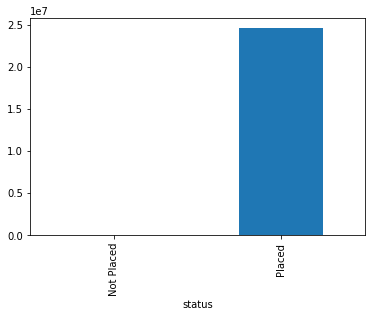

In [9]:
train_raw.groupby('status').sum().salary.plot(kind='bar')

Come era possibile immaginare le persone che non hanno trovato collocazione non hanno uno stipendio offerto . Per fortuna non ci sono casi in cui si poteva attestare il contrario sennò andavano rimossi .

## Verifiche iniziali su dati di TEST
passaggi ripetuti anche su dati di test ,ragionamenti e finalità uguali  

In [10]:
test_raw.dtypes

status             object
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
salary            float64
dtype: object

In [11]:
test_raw.isnull().sum()

status             0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            14
dtype: int64

In [12]:
test_raw["salary"].replace(np.nan, 0, inplace=True)

<AxesSubplot:xlabel='status'>

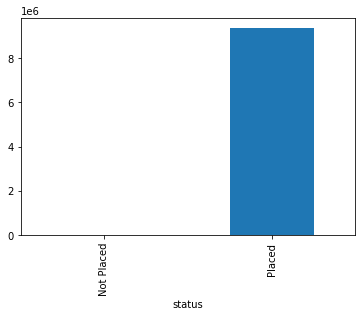

In [13]:
test_raw.groupby('status').sum().salary.plot(kind='bar')

## Studio e analisi dei dati 

Prima di procedere all'analisi dei dati bisogna mettere ordine e far si che l'analisi si possa fare nel modo giusto . Verificando se essi sono espressi nel giusto modo . 

In [14]:
train_raw['status'].replace(to_replace='Placed', value=1, inplace=True)
train_raw['status'].replace(to_replace='Not Placed',  value=0, inplace=True)

In [15]:
train_raw.head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,0,M,44.0,Central,58.0,Central,Arts,55.0,Comm&Mgmt,Yes,64.25,Mkt&HR,58.54,0.0
1,1,M,66.0,Central,76.0,Central,Commerce,72.0,Comm&Mgmt,Yes,84.00,Mkt&HR,58.95,275000.0
2,1,M,63.0,Central,60.0,Central,Commerce,57.0,Comm&Mgmt,Yes,78.00,Mkt&Fin,54.55,204000.0
3,1,F,73.0,Others,63.0,Others,Science,66.0,Comm&Mgmt,No,89.00,Mkt&Fin,60.50,216000.0
4,0,M,52.0,Others,65.0,Others,Arts,57.0,Others,Yes,75.00,Mkt&Fin,59.81,0.0


Converto i valori di status in valori binari per migliorare la comprensione e per effettuare successivamente analisi e ora lo farò anche per gli altri valori , ove possibile. Li ho messi qui per poter graficare la correlazione , ma effettivamente li userò solo in seguito. Encoding fatto con dummies

In [16]:
tr_dummies = pd.get_dummies(train_raw)
tr_dummies.head()

,status,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,0,44.0,58.0,55.0,64.25,58.54,0.0,0,1,1,...,1,0,0,1,0,0,0,1,0,1
1,1,66.0,76.0,72.0,84.00,58.95,275000.0,0,1,1,...,0,1,0,1,0,0,0,1,0,1
2,1,63.0,60.0,57.0,78.00,54.55,204000.0,0,1,1,...,0,1,0,1,0,0,0,1,1,0
3,1,73.0,63.0,66.0,89.00,60.50,216000.0,1,0,0,...,0,0,1,1,0,0,1,0,1,0
4,0,52.0,65.0,57.0,75.00,59.81,0.0,0,1,0,...,1,0,0,0,1,0,0,1,1,0


Ho convertito anche tutti gli altri valori , utilizzando questo metodo get_dummies al fine di semplificare l'analisi dei dati e delle rappresentazioni grafiche



<AxesSubplot:>

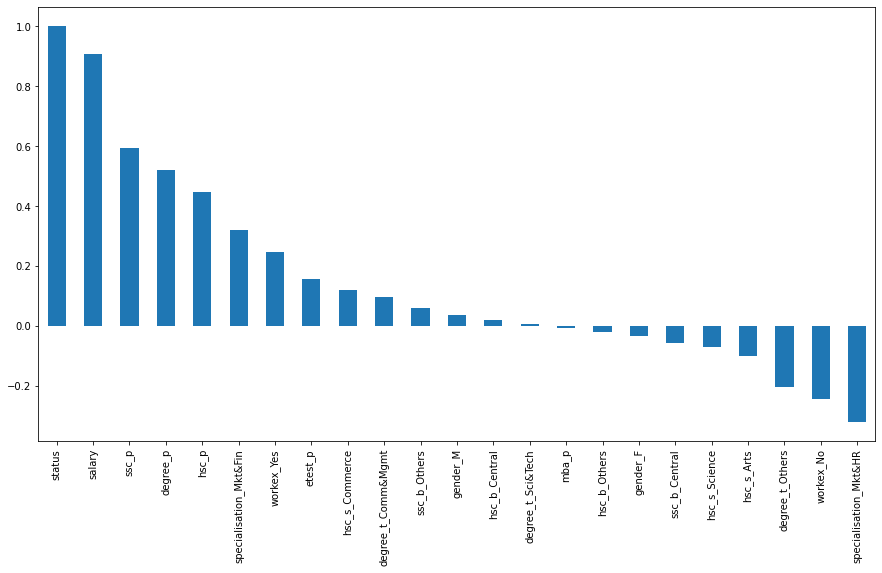

In [17]:
#Calcolo della correlazione fra Status e le altre variabili 
plt.figure(figsize=(15,8))
tr_dummies.corr()['status'].sort_values(ascending = False).plot(kind='bar')

Una correlazione potrebbe essere positiva, nel senso che entrambe le variabili si muovono nella stessa direzione, o negativa, nel senso che quando il valore di una variabile aumenta, i valori delle altre variabili diminuiscono. La correlazione può anche essere neutra o zero, il che significa che le variabili non sono correlate , quindi la correlazione è nulla. A noi interessa vedere la correlazione con lo status ovviamente quindi confronteremo questa nel grafico.

Mi aspettavo una correlazione molto alta fra "status" e "salary" , anche perche tutti quelli che sono senza lavoro non hanno uno stipendio offerto .. quando verrà fatta la classificazione gli studenti con "salary"=0 saranno classificati direttamente come "Not Placed" sebbene sia giusto il ragionamento voglio determinare se essi sono "Placed" o "Non Placed" in base alle loro ulteriori caratteristiche fornite . Quindi sicuramente successivamente eliminerò "salary"..

Come studiato da kaggle -> " Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features. " 
In effetti a pensarci bene anche il punteggio di scuola media (ssc_p) non vedo come possa influire cosi tanto su un possibile collocamento nel mondo del lavoro . Ma vedrò bene successivamente cosa farne..


### Analisi del Status Rate 

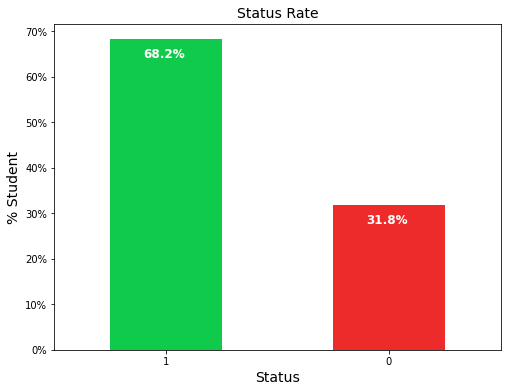

In [18]:
colors = ['#10CB4B','#EE2B2B']
ax = (train_raw['status'].value_counts()*100.0/len(train_raw)).plot(kind='bar',stacked = True, rot = 0,
                                                                    color = colors,
                                                                    figsize = (8,6) 
                                                                    )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Student',size = 14)
ax.set_xlabel('Status',size = 14)
ax.set_title('Status Rate', size = 14)


totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
 
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 12)

### 1 = Placed
### 0 = Not Placed

Il 68.2% di studenti è collocato nel mondo del lavoro , mentre il 31.8% no ...

### Analisi del Gender 

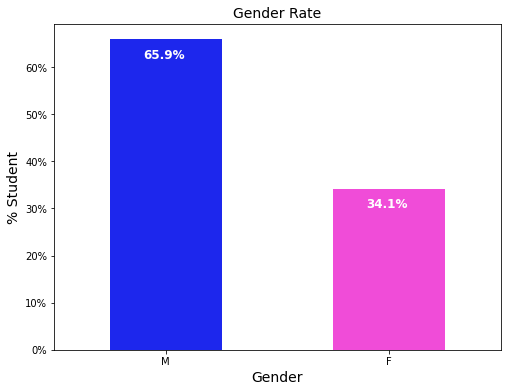

In [19]:
colors = ['#1D27ED','#F04CD8']
ax = (train_raw['gender'].value_counts()*100.0/len(train_raw)).plot(kind='bar',stacked = True, rot = 0,
                                                                    color = colors,
                                                                    figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Student',size = 14)
ax.set_xlabel('Gender',size = 14)
ax.set_title('Gender Rate', size = 14)

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
 
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 12)

Abbiamo il 31% in piu di studenti maschi rispetto alle femmine.

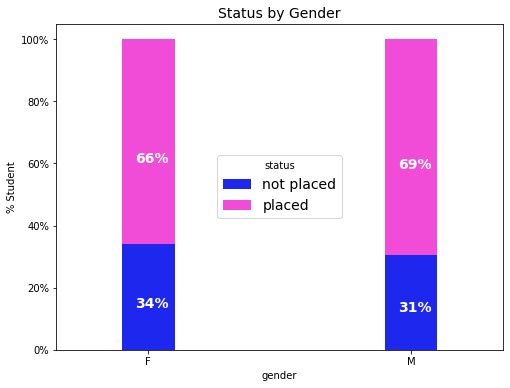

In [20]:
colors = ['#1D27ED','#F04CD8']
gender_churn = train_raw.groupby(['gender','status']).size().unstack()

ax = (gender_churn.T*100.0 / gender_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend( ["not placed","placed"] , loc='center',prop={'size':14},title = 'status' , )
ax.set_ylabel('% Student')
ax.set_title('Status by Gender',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Anche se il numero di ragazze è minore rispetto a quello dei ragazzi lo stato di collocazione è quasi equo! 

### Analisi del Degree T (settore disciplinare di laurea)

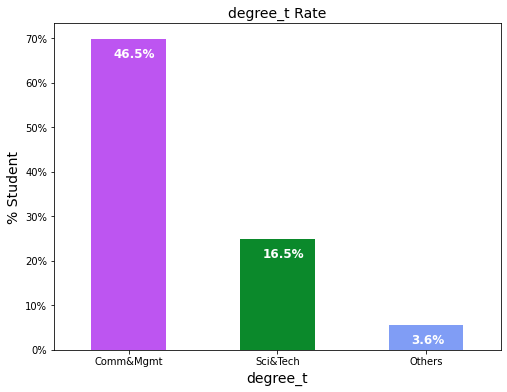

In [21]:
colors = ['#BD55F1','#0B892B', '#809DF5']
ax = (train_raw['degree_t'].value_counts()*100.0/len(train_raw)).plot(kind='bar',stacked = True, rot = 0,
                                                                    color = colors,
                                                                    figsize = (8,6) 
                                                                    )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Student',size = 14)
ax.set_xlabel('degree_t',size = 14)
ax.set_title('degree_t Rate', size = 14)


totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
 
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 12)

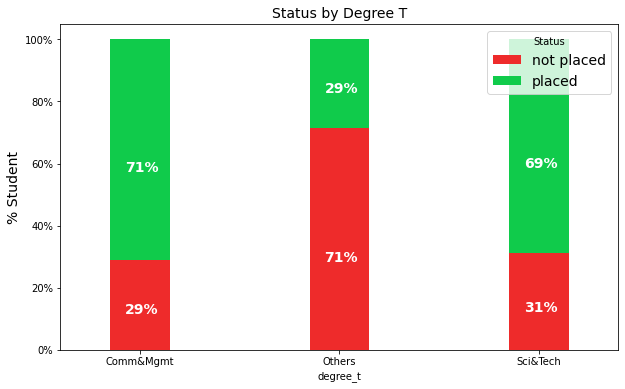

In [22]:
colors = ['#EE2B2B','#10CB4B']
degree_status = train_raw.groupby(['degree_t','status']).size().unstack()

ax = (degree_status.T*100.0 / degree_status.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(["not placed","placed"],loc='best',prop={'size':14},title = 'Status')
ax.set_ylabel('% Student',size = 14)
ax.set_title('Status by Degree T',size = 14)

# codice per aggiungere etich. al grafico
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',  #numerelli
               weight = 'bold',
               size = 14)

In [23]:
degCount = train_raw.groupby('degree_t')['status'].agg(['count'])
degCount

,count
degree_t,
Comm&Mgmt,90
Others,7
Sci&Tech,32


Come possiamo vedere dal primo grafico il numero di studenti laureati in Comm&Mgmt è superiore di quasi il triplo rispetto agli studenti laureati in Sci&Tech, mentre gli studenti laureati in altro sono in netta minoranza rispetto a tutti gli altri . 
Dal secondo grafico si puo notare che gli studenti di Comm&Mgmt e Sci&Tech hanno le stesse % di placed ma nel primo caso gli studenti sono molti di piu ! Sci&Tech posso anche rimuoverlo ma sarebbe inutile sono talmente pochi !!

### Analisi del Workex ( esperienza lavorativa) 

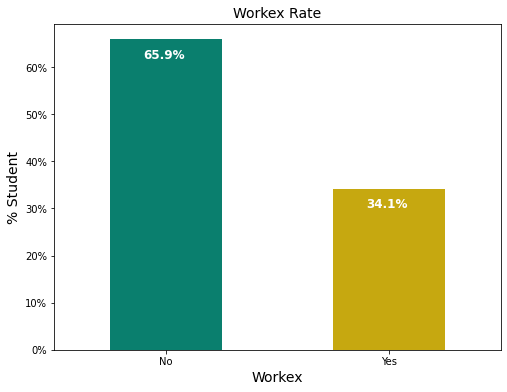

In [24]:
colors = ['#0A7F6E','#C6A810']
ax = (train_raw['workex'].value_counts()*100.0/len(train_raw)).plot(kind='bar',stacked = True, rot = 0,
                                                                    color = colors,
                                                                    figsize = (8,6) 
                                                                    )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Student',size = 14)
ax.set_xlabel('Workex',size = 14)
ax.set_title('Workex Rate', size = 14)


totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
 
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 12)

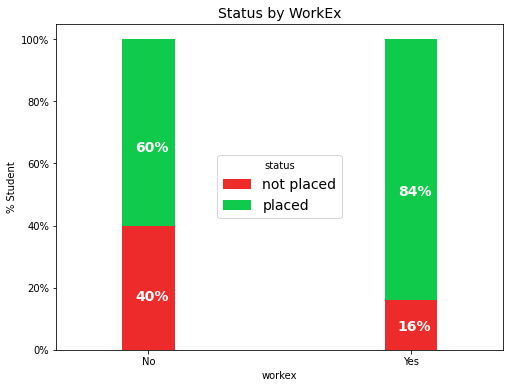

In [25]:
colors = ['#EE2B2B','#10CB4B']
workex_status = train_raw.groupby(['workex','status']).size().unstack()

ax = (workex_status.T*100.0 / workex_status.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend( ["not placed","placed"] , loc='center',prop={'size':14},title = 'status' , )
ax.set_ylabel('% Student')
ax.set_title('Status by WorkEx',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Piu del 34% dei ragazzi ha già avuto un'esperienza lavorativa , mentre il restante 66% no(dal primo grafico)..  In effetti le esperienze lavorative fatte sono molto imporanti , infatti dall'ultimo grafico si puo notare la differenza solo una piccola parte (16%) degli studenti che ha avuto esperienza lavorativa non lavora , il resto 84% è collocato . Mentre il 40% delle persone che non ha avuto esperienze lavorative , non è collocato . 
C'è una bella differenza fra 16 e 40 % ! feature importante.

### Analisi dello specialisation ( specializzazione) 

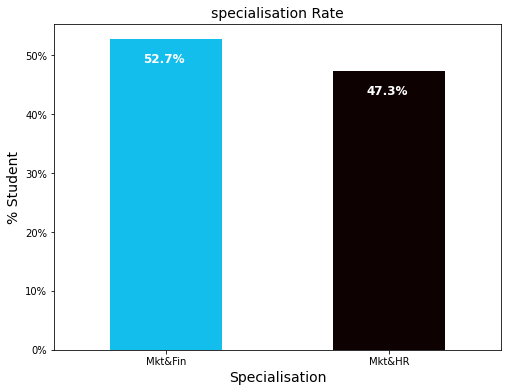

In [26]:
colors = ['#13BDEC','#0E0101']
ax = (train_raw['specialisation'].value_counts()*100.0/len(train_raw)).plot(kind='bar',stacked = True, rot = 0,
                                                                    color = colors,
                                                                    figsize = (8,6) 
                                                                    )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Student',size = 14)
ax.set_xlabel('Specialisation',size = 14)
ax.set_title('specialisation Rate', size = 14)


totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
 
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 12)

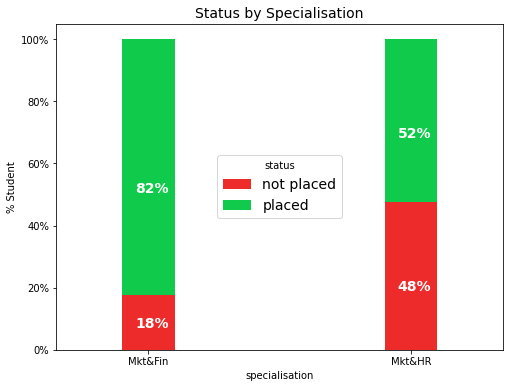

In [27]:
colors = ['#EE2B2B','#10CB4B']
spec_status = train_raw.groupby(['specialisation','status']).size().unstack()

ax = (spec_status.T*100.0 / spec_status.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend( ["not placed","placed"] , loc='center',prop={'size':14},title = 'status' , )
ax.set_ylabel('% Student')
ax.set_title('Status by Specialisation',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Tutti gli studenti debbono avere una specializzazione post laurea poichè non abbiamo trovato nessun valore mancante . Diciamo che le due specializzazioni sono equipartite fra gli studenti . Però nel primo caso gli studenti con specializzazione in Mkt&Fin sono un pochino piu avvantaggiati a trovare collocazione rispetto agli altri con specializzazione Mkt&HR , Fin>HR a quanto pare .. 

### Analisi della hsc_s ( tipologia del liceo)

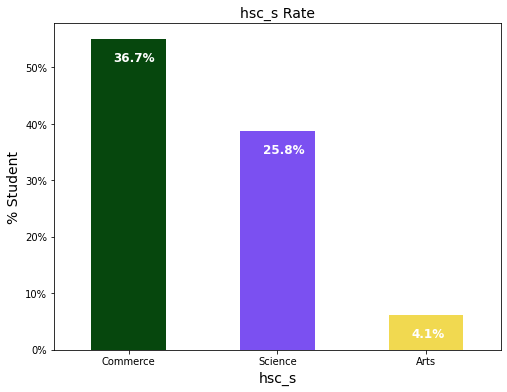

In [28]:
colors = ['#06470D','#7B50F1', '#F1D950']
ax = (train_raw['hsc_s'].value_counts()*100.0/len(train_raw)).plot(kind='bar',stacked = True, rot = 0,
                                                                    color = colors,
                                                                    figsize = (8,6) 
                                                                    )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Student',size = 14)
ax.set_xlabel('hsc_s',size = 14)
ax.set_title('hsc_s Rate', size = 14)


totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
 
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 12)

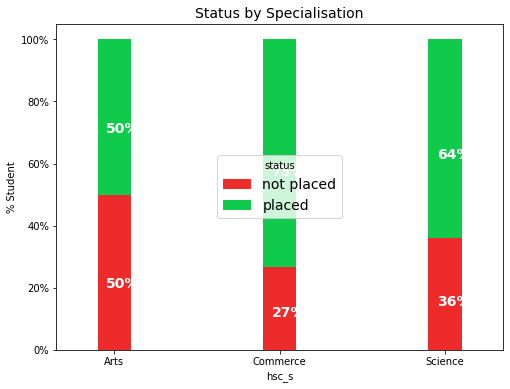

In [29]:
colors = ['#EE2B2B','#10CB4B']
hscs_status = train_raw.groupby(['hsc_s','status']).size().unstack()

ax = (hscs_status.T*100.0 / hscs_status.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend( ["not placed","placed"] , loc='center',prop={'size':14},title = 'status' , )
ax.set_ylabel('% Student')
ax.set_title('Status by Specialisation',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Come possiamo vedere gli studenti del "Commerce" sono quelli che hanno piu tasso di occupazione ben 73% , mentre un 50% per gli studenti di "Arts" e un 64% per quelli di "Science" , in effetti sembra anche dalle analisi fatte in precedenza che i ragazzi con specializzazioni in ambito commerciale siano piu propensi ad essere nello status "placed" MA bisogna dire che sono anche in maggioranza e quindi piu o meno sono bilanciate mentre Arts non fa molto testo poichè rappresenta davvero una minimissima parte!

### Analisi hsc_b ( commissione esterna / interna per diploma)

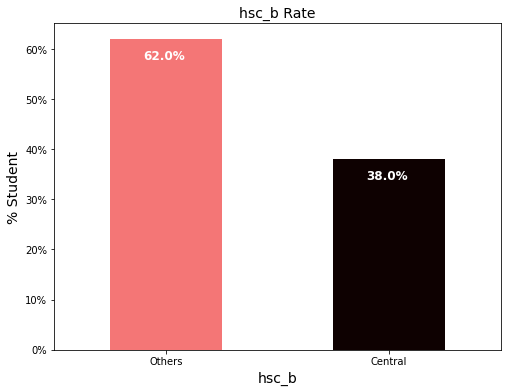

In [30]:
colors = ['#F47676','#0E0101']
ax = (train_raw['hsc_b'].value_counts()*100.0/len(train_raw)).plot(kind='bar',stacked = True, rot = 0,
                                                                    color = colors,
                                                                    figsize = (8,6) 
                                                                    )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Student',size = 14)
ax.set_xlabel('hsc_b',size = 14)
ax.set_title('hsc_b Rate', size = 14)


totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
 
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 12)

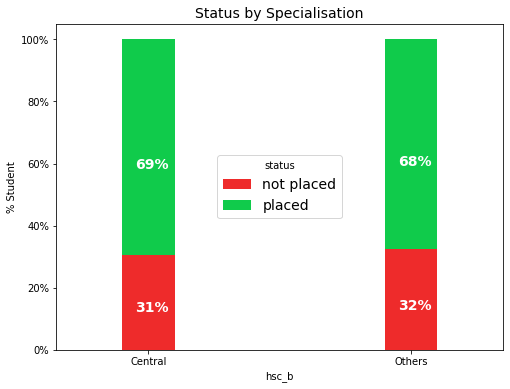

In [31]:
colors = ['#EE2B2B','#10CB4B']
hscb_status = train_raw.groupby(['hsc_b','status']).size().unstack()

ax = (hscb_status.T*100.0 / hscb_status.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend( ["not placed","placed"] , loc='center',prop={'size':14},title = 'status' , )
ax.set_ylabel('% Student')
ax.set_title('Status by Specialisation',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Statistiche praticamente identiche .. feature che influisce molto poco sui nostri studi , può essere droppata.

### Analisi dell' etest_p ( punteggio test di collocabilità) 

<AxesSubplot:xlabel='status', ylabel='etest_p'>

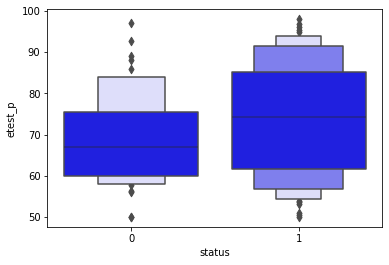

In [32]:
sns.boxenplot(x=train_raw['status'], y=train_raw['etest_p'],
              color="blue", 
              scale="linear", data=train_raw)

In [33]:
train_raw.groupby(['status'])['etest_p'].mean().reset_index().sort_values('etest_p', ascending=False)

,status,etest_p
1,1,73.682273
0,0,69.284878


In [34]:
train_raw.groupby(['status'])['etest_p'].count().reset_index().sort_values('etest_p', ascending=False)

,status,etest_p
1,1,88
0,0,41


Il   Punteggio test di collocabilità  potrebbe influire su di essa , potrebbe darsi che se il punteggio è alto più grande sarà la possibilità di essere nello stato placed , MA OVVIAMENTE si vede dal grafico che non è esattamente cosi anche perchè la media che possiamo vedere nel penultimo grafico generato non è poi tanto diversa..mi aspettavo una divisione piu netta ..però c'è anche da dire che i ragazzi con status placed sono il doppio degli altri .. tecnicamente dovrebbe essere un parametro molto importante/soglia per poter essere assunto in un futuro ..

## Analisi dell' degree_p ( punteggio laurea)

<AxesSubplot:xlabel='status', ylabel='degree_p'>

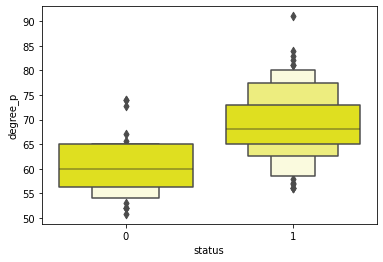

In [35]:
sns.boxenplot(x=train_raw['status'], y=train_raw['degree_p'],
              color="yellow", 
              scale="linear", data=train_raw)

Qui c'è una differenza leggermente piu netta rispetto a prima .. ed essa varia rispetto al punteggio ottenuto da unan laurea! 

## Analisi dell' hsc_p (punteggio diploma)

<AxesSubplot:xlabel='status', ylabel='hsc_p'>

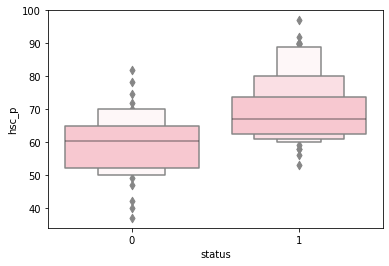

In [36]:
sns.boxenplot(x=train_raw['status'], y=train_raw['hsc_p'],
              color="pink", 
              scale="linear", data=train_raw)

Affluenza maggiore di placed con voti > di 70 .. infatti possiamo notare che proprio nella prima tabella generata quando stavo analizzando gli studenti con salario 0 e quindi stato "not Placed" è possibile vedere che in pochi superano il voto 70 (giusto un paio) 

## Analisi ssc_p (punteggio medie)

<AxesSubplot:xlabel='status', ylabel='ssc_p'>

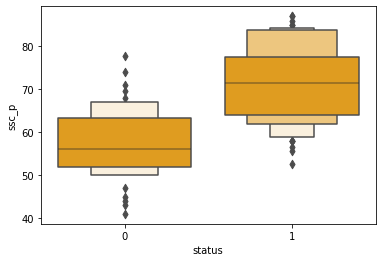

In [38]:
sns.boxenplot(x=train_raw['status'], y=train_raw['ssc_p'],
              color="orange", 
              scale="linear", data=train_raw)

La maggior parte di studenti che hanno preso un superiore a 70 sono nello status 1 . Forse è una coincidenza? Dato che a RAGIONAMENTO il voto delle medie potrebbe influire molto poco dato che poi gli studi hanno un seguito piu importante. Però i dati parlano chiaro e dropparlo sarebbe un po un rischio anche se intuitivamente lo avrei droppato subito...

## Analisi MBA_p ( punteggio specializzazione post laurea)

<AxesSubplot:xlabel='status', ylabel='mba_p'>

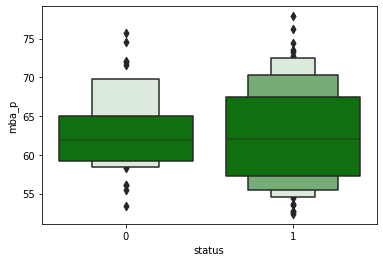

In [39]:
sns.boxenplot(x=train_raw['status'], y=train_raw['mba_p'],
              color="green", 
              scale="linear", data=train_raw)

Uno studente con votazione simile o uguale potrebbe essere nello stato placed oppure no , anzi studente con mba bassa potrebbe essere nello status placed e uno con punteggio mba alto no , dal grafico si capisce questo .. non penso sia una feature molto significativa 

<AxesSubplot:title={'center':'Correlazione dei dati di Train'}>

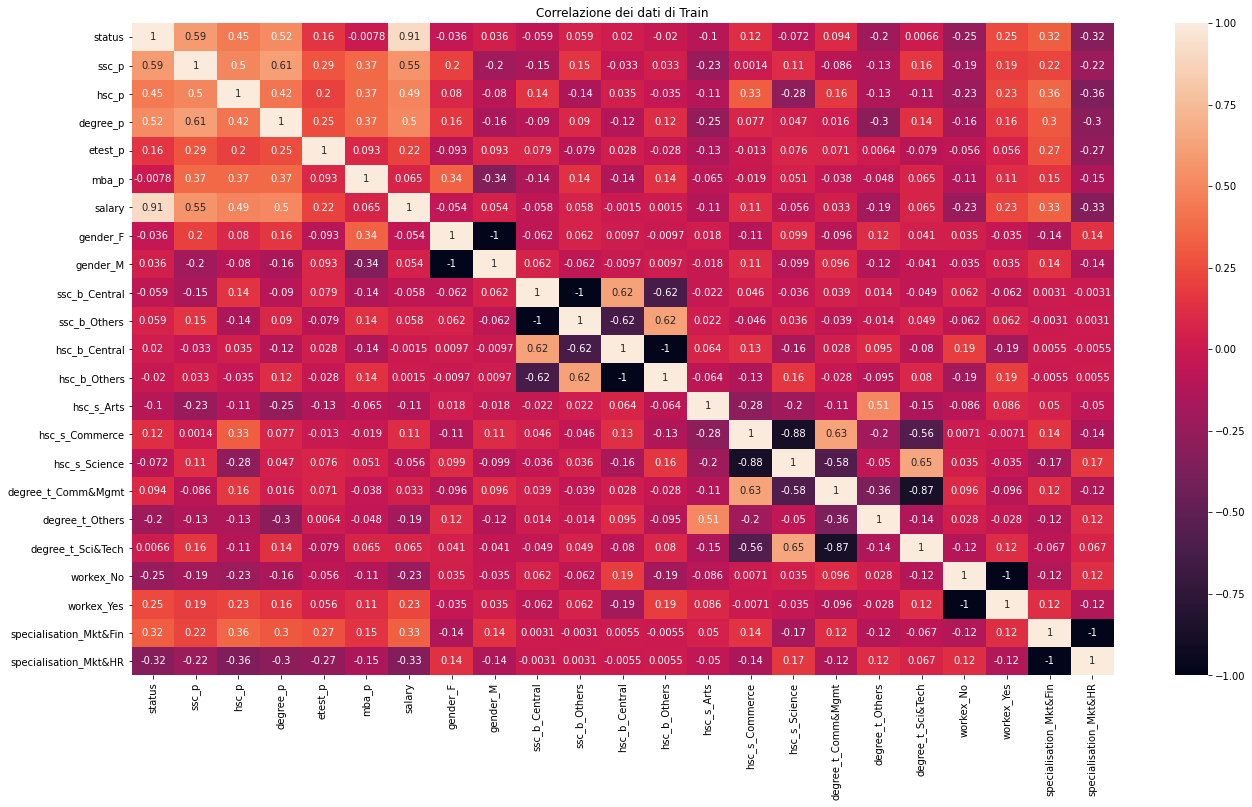

In [41]:
plt.figure(figsize=(22,12))
plt.title("Correlazione dei dati di Train")
sns.heatmap(data=tr_dummies.corr(), annot=True)

Visualizzo la heatmap che mi fa capire quale sia la correlazione che ho fra le feature !

## Prima di passare all'addestramento dei dati , faccio della pulizia sui dati di test .¶
Attuo gli stessi procedimenti che ho fatto inizialmente con i dati di TRAIN , ora lo faccio con quelli di TEST.

In [42]:
test_raw['status'].replace(to_replace='Placed', value=1, inplace=True)
test_raw['status'].replace(to_replace='Not Placed',  value=0, inplace=True)

In [43]:
ts_dummies = pd.get_dummies(test_raw)   #encoding fatto con dummies anche per train
ts_dummies.head()

,status,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1,65.00,68.00,69.00,53.70,55.01,250000.0,0,1,1,...,0,0,1,1,0,0,1,0,0,1
1,0,59.96,42.16,61.26,54.48,65.48,0.0,0,1,0,...,0,0,1,0,0,1,1,0,0,1
2,0,40.89,45.83,53.00,71.20,65.49,0.0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
3,1,60.80,68.40,64.60,82.66,64.34,940000.0,0,1,1,...,0,1,0,1,0,0,0,1,1,0
4,1,73.00,78.00,73.00,85.00,65.83,240000.0,0,1,1,...,0,0,1,0,0,1,0,1,0,1


In [44]:
tr_dummies.duplicated().sum()  #mi dice quante linee sono duplicate

0

In [45]:
ts_dummies.duplicated().sum()  #mi dice quante linee sono duplicate

0

### Dopo un'opportuna analisi dei dati e della correlazione ho deciso di droppare alcune feature :

#### -  Scelgo di togliere la feature "salary" per i motivi all'inizio elencati che riporto anche qui : quando verrà fatta la classificazione gli studenti con "salary"=0 saranno classificati direttamente come "Not Placed" sebbene sia giusto il ragionamento voglio determinare se essi sono "Placed" o "Non Placed" in base alle loro ulteriori caratteristiche fornite . Quindi elimino "salary". 

#### - Ho deciso di droppare il gender dato che la sua correlazione con status è molto vicina allo 0 , stessa cosa anche per hsc_b dopo l'analisi grafica.

#### - Inoltre  elimino anche i valori relativi a hsc_s data la correlazione media fra di esse molto bassa e il loro approccio alla feature status vista  nel grafico relativo ad essa


#### - Droppata anche mba_p ragionamento simile e rivedibile nello studio grafico fatto in precedenza , guardando la heatmap ho capito che deve essere droppata valore vicino allo 0 .


In [46]:
tr= tr_dummies.drop(["salary","hsc_b_Others","hsc_b_Central", "gender_M","gender_F","mba_p" ,"hsc_s_Arts","hsc_s_Commerce","hsc_s_Science"], axis=1)
tr.head()

,status,ssc_p,hsc_p,degree_p,etest_p,ssc_b_Central,ssc_b_Others,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,0,44.0,58.0,55.0,64.25,1,0,1,0,0,0,1,0,1
1,1,66.0,76.0,72.0,84.00,1,0,1,0,0,0,1,0,1
2,1,63.0,60.0,57.0,78.00,1,0,1,0,0,0,1,1,0
3,1,73.0,63.0,66.0,89.00,0,1,1,0,0,1,0,1,0
4,0,52.0,65.0,57.0,75.00,0,1,0,1,0,0,1,1,0


In [47]:
ts= ts_dummies.drop(["salary","hsc_b_Others","hsc_b_Central","gender_M","gender_F","mba_p","hsc_s_Arts","hsc_s_Commerce","hsc_s_Science"], axis=1)
ts.head()

,status,ssc_p,hsc_p,degree_p,etest_p,ssc_b_Central,ssc_b_Others,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1,65.00,68.00,69.00,53.70,1,0,1,0,0,1,0,0,1
1,0,59.96,42.16,61.26,54.48,0,1,0,0,1,1,0,0,1
2,0,40.89,45.83,53.00,71.20,0,1,1,0,0,1,0,0,1
3,1,60.80,68.40,64.60,82.66,1,0,1,0,0,0,1,1,0
4,1,73.00,78.00,73.00,85.00,1,0,0,0,1,0,1,0,1


# Addestramento dati 

In [48]:
# Normalizzo nell'intervallo [0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

names = tr.columns # nomi di tutte le colonne
train_new = scaler.fit_transform(tr)
train = pd.DataFrame(train_new, columns=names)

names = ts.columns # nomi di tutte le colonne
test_new = scaler.fit_transform(ts)
test = pd.DataFrame(test_new, columns=names)


In [49]:
x_train = train.drop(["status"], axis=1)
y_train = train["status"]

x_test = test.drop(["status"], axis=1)
y_test = test["status"]

In [51]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(x_train, y_train)

print("Accuracy: {:.3f}".format(tree.score(x_test, y_test)*100))

Accuracy: 81.395


Ecco l'accuracy registrata.. non aggiungo commenti sul Decision Tree Classifier poichè è stato un argomento spiegato a lezione

# Ulteriore algoritmo per addestrare i dati.
vedendo cosa succede all'accuracy 

### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [53]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    accuracy = accuracy_score(test_labels, predictions)
   
    print('PERFORMANCES :')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy*100))
    print('\nFinal Accuracy Value:')
    return accuracy*100

La funzione fit() crea il modello previsionale, ossia un classificatore che è in grado di classificare le istanze secondo l'addestramento ricevuto.
La funzione evaluate calcola e restituisce tutti i valori utili per lo studio . Dopo l'addestramento sollecito il modello di predirre e classificare alcuni esempi di test (differenti da quelli di training) tramite la funzione pred() di Scikit-learn e verifico se risponde correttamente e li assegno alla variabile predictions. Successivamente calcolo gli errori e l'accuracy che ci indica la frazione dei campioni predetti correttamente.

In [54]:
evaluate(rfc, x_test, y_test)

PERFORMANCES :
Average Error: 0.0698 degrees.
Accuracy = 93.02%.

Final Accuracy Value:


93.02325581395348

#### Alcune note sull'algoritmo Random Forest Classifier

Random Forest Classifier consiste in centinaia di migliaia di alberi decisionali. Il numero di alberi dipende dalla natura del set di training e da altri parametri come il numero di classi (bean ,profondità).Il numero ottimale di alberi può essere trovato usando la “convalida incrociata”, dall’inglese cross-validation, per la divisione del set di dati. Altrimenti, può essere trovato osservando l'errore out-of-bug che è espresso in termini di errore di training e test. Dopo vengono calcolate le distanze per ogni coppia di casi. Quando due casi occupano lo stesso nodo target, la prossimità viene aumentata di uno per ciascun caso. Tuttavia, alla fine di ogni iterazione, i valori di prossimità vengono normalizzati dividendoli per il numero di alberi, che sono stati costruiti e specificati durante il periodo di allenamento. Il calcolo della distanza dei casi ha molti contributi per migliorare la previsione.